In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
from scipy import ndimage

Indlæsning af stier til filerne samt labeling af om patienten har cancer eller ej.

In [2]:
path = 'C:/Users/kvjkv/Downloads/prostate158_train/prostate158_train/train/'
dirs = os.listdir(path)
label = np.ones([len(dirs),1])

for idx, x in enumerate(dirs):
    dirs[idx] = path+x+'/t2.nii.gz'
    if os.path.isfile(path + x + '/empty.nii.gz'):
        label[idx] = 0

In [5]:
x_data = np.empty([139, 270, 270, 24], dtype=np.ndarray);

for idx, impath in enumerate(dirs):
    img = zoom_function(impath)
    x_data[idx] = img

In [4]:
def zoom_function(path1):
    img = nib.load(path1).get_fdata()
    desired_depth = 24
    desired_width = 270
    desired_height = 270

    actual_depth = img.shape[-1]
    actual_width = img.shape[0]
    actual_height = img.shape[1]

    depthfactor = 1/(actual_depth/desired_depth)
    widthfactor = 1/(actual_width/desired_width)
    heightfactor = 1/(actual_height/desired_height)

    newimg = ndimage.zoom(img, (widthfactor, heightfactor, depthfactor), order=1)
    return newimg

(442, 442, 25)
(270, 270, 24)


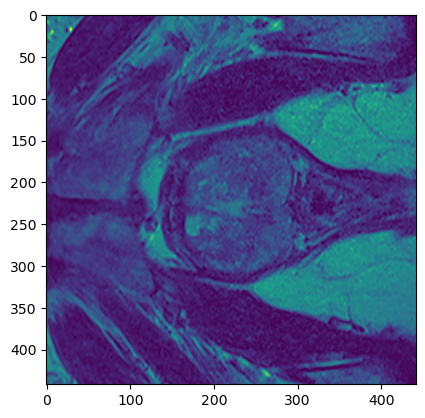

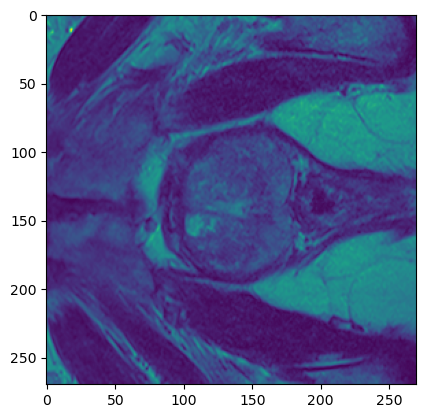

In [6]:
img = nib.load(path+'044/t2.nii.gz').get_fdata()

print(img.shape)

desired_depth = 24
desired_width = 270
desired_height = 270

actual_depth = img.shape[-1]
actual_width = img.shape[0]
actual_height = img.shape[1]

depthfactor = 1/(actual_depth/desired_depth)
widthfactor = 1/(actual_width/desired_width)
heightfactor = 1/(actual_height/desired_height)

newimg = ndimage.zoom(img, (widthfactor, heightfactor, depthfactor), order=1)

print(newimg.shape)

plt.imshow(img[:,:,10])
plt.figure()
plt.imshow(newimg[:,:,10])

Hentet fra https://dev.to/narendraanupoju/mri-data-processing-with-python-1jgg

In [7]:

from glob import glob
files = glob('C:/Users/kvjkv/Downloads/prostate158_train/prostate158_train/train/*.nii')  #file extension can be .nii or .nii.gz
all_files = []
for file in files:
    data = nib.load(file).get_fdata()
    all_files.append(data)

In [8]:
files

[]